In [1]:
import json, urllib,sys, pandas as pd #импортируем модули парсинга json, скачивание с инета, пандас
from datetime import datetime as dt # импортируем модуль работы с датами

In [2]:
Ndays=2000

In [5]:
#('stock','shares',57,'LKOH')   
# ('stock','bonds',58,'SU26220RMFS2')
#('futures','forts',45, 'SiH9')
#('currency','selt',13,'EUR_RUB__TOM')  ('currency','selt',13,'USD000UTSTOM')
# ('stock','shares',57,'GMKN')
#engine,market,boardgroup,ticker=('stock','shares',57,'GMKN')
engine,market,boardgroup,ticker=('stock','shares',57,'LKOH')

In [6]:
url='https://iss.moex.com/cs/'
url=url+'engines/%s/markets/%s/boardgroups/%s/securities/%s.hs?s1.type=candles&interval=24&candles=%s' % (engine,market,boardgroup,ticker,Ndays)
try: s = urllib.request.urlopen(url).read()
except urllib.error.HTTPError as e: print('Ошибка скачивания:',e); sys.exit()

In [7]:
dictslists=json.loads(s) #парсим текстовый документ из формата json в формат "dict&lists"

In [8]:
listOHLC=dictslists['candles'][0]['data'] # выбираем только OHLC
listV=dictslists['volumes'][0]['data']# выбираем только V

In [9]:
dfOHLC=pd.DataFrame(listOHLC,columns=['Date','Open','High','Low','Close']) # парсим OHLC в таблицу(dataframe) пандаса
dfV=pd.DataFrame(listV,columns=['Date','Volume']) # парсим V в таблицу(dataframe) пандаса

In [10]:
if len(dfOHLC)==0: print('Нет данных'); sys.exit()
dfOHLC.index=pd.to_datetime(dfOHLC['Date'],unit='ms') # кол-ку в ф-те UNIX(ms) конв-ем во внутр формат даты И ставим индексом
dfV.index=pd.to_datetime(dfV['Date'],unit='ms') # кол-ку в ф-те UNIX(ms) конв-ем во внутр формат даты И ставим индексом

,Open,High,Low,Close,Volume
Date,,,,,
2012-09-04,1864.5,1877.0,1856.4,1873.9,1.801670e+09
2012-09-05,1868.0,1878.3,1858.7,1861.6,1.738350e+09
2012-09-06,1860.1,1899.0,1860.1,1891.1,2.558160e+09


,Open,High,Low,Close,Volume
Date,,,,,
2020-08-19,5266.0,5313.0,5233.0,5246.5,3.326540e+09
2020-08-20,5220.0,5231.0,5088.0,5137.5,6.309900e+09
2020-08-21,5150.5,5158.0,5027.0,5091.0,5.222190e+09


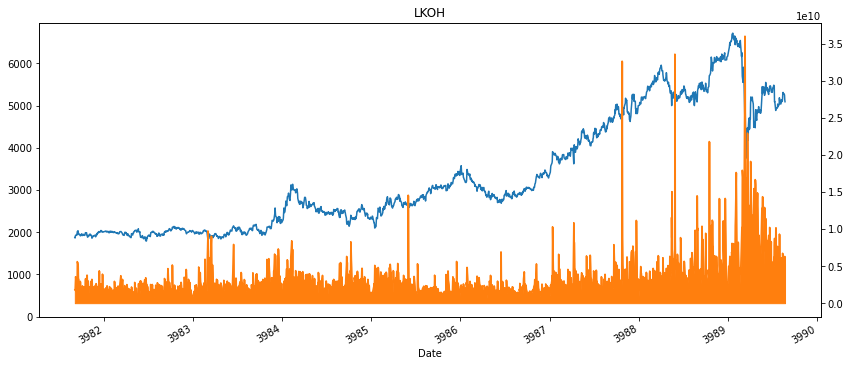

In [11]:
dfOHLC=dfOHLC.drop('Date',axis=1)
dfV=dfV.drop('Date',axis=1)
dfOHLCV=pd.concat([dfOHLC,dfV],axis=1) # сваливаем OHLC и V в единую таблицу(dataframe) пандаса
#dfOHLCV=dfOHLCV[dt(2010,1,1):dt(2018,1,1)] #раскомментировать, если нужно работать с диапазоном
display(dfOHLCV[:3]) #посмотреть первые 3 значения
display(dfOHLCV[-3:]) #посмотреть последние 3 значения
dfOHLCV['Close'].plot(figsize =(14,6),title=ticker) # figsize=(,) это размеры по ширине и высоте
dfOHLCV['Volume'].plot(secondary_y=True,kind='area'); # secondary_y=True рисовать на правой шкале

Обратите внимание — знать только тикер инструмента недостаточно. Нужно знать «engine»,«market»,«boardgroup»,«ticker». Для одной секции — первые 3 параметра одинаковые, поэтому те кто торгует ликвидными акциями могут в скрипте менять только название тикера и оставить всё «as is». Для других секций (валюта, фортс, офз) — приведены примеры.